In [142]:
## import packages
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import matplotlib as plt

In [137]:
# read in data
train = pd.read_csv('training_set.csv',encoding = 'unicode_escape', parse_dates=True)
#test = pd.read_csv('holdout_set.csv',encoding = 'unicode_escape', parse_dates=True)

In [138]:
train.head()

,Engagements,Followers at Posting,Created,Type,Description
0,502093,36984682,2019-05-21 23:30:51 EDT,Video,The @raptors bench trio of @sergeibaka @norman...
1,603380,36984682,2019-05-21 22:53:33 EDT,Video,@kyle_lowry7 pulls from deep for the @raptors ...
2,603380,36984682,2019-05-21 22:19:58 EDT,Video,@k_mid22 with some english on the @bucks dime!
3,725100,36984682,2019-05-21 22:02:41 EDT,Video,Kawhi punches it home with the left on TNT!
4,661446,36984682,2019-05-21 20:47:49 EDT,Video,@giannis_an34 goes baseline early to rock the ...


AttributeError: 'AxesSubplot' object has no attribute 'show'

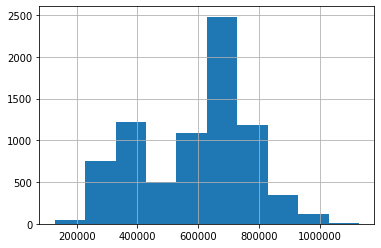

In [144]:
train['Engagements'].hist().show()

In [5]:
# convert date to datetime
train['Created'] = pd.to_datetime(train['Created'])
train.dtypes

c:\users\jd cook\anaconda3\envs\nba\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
c:\users\jd cook\anaconda3\envs\nba\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


Engagements                      int64
Followers at Posting             int64
Created                 datetime64[ns]
Type                            object
Description                     object
dtype: object

In [12]:
train.head()

,Engagements,Followers at Posting,Created,Type,Description,weekday,weekend,hour,timeOfDay,mon,offseason
0,502093,36984682,2019-05-21 23:30:51,Video,The @raptors bench trio of @sergeibaka @norman...,1,N,23,Night,5,N
1,603380,36984682,2019-05-21 22:53:33,Video,@kyle_lowry7 pulls from deep for the @raptors ...,1,N,22,Night,5,N
2,603380,36984682,2019-05-21 22:19:58,Video,@k_mid22 with some english on the @bucks dime!,1,N,22,Night,5,N
3,725100,36984682,2019-05-21 22:02:41,Video,Kawhi punches it home with the left on TNT!,1,N,22,Night,5,N
4,661446,36984682,2019-05-21 20:47:49,Video,@giannis_an34 goes baseline early to rock the ...,1,N,20,Night,5,N


In [9]:
train['weekday'] = train['Created'].apply(lambda x: x.weekday())

In [13]:
# create date based fields
train['weekday'] = train['Created'].apply(lambda x: x.weekday())
train['weekend'] = np.where(train['weekday'] >= 4,'Y','N')
train['hour'] = train['Created'].dt.hour
train['timeOfDay'] = np.where((train['hour'] >= 2) & (train['hour'] <=11) ,'Morning',
                              np.where((train['hour'] >= 12) & (train['hour'] <=15),'Afternoon', np.where(
                                  (train['hour'] >= 16) & (train['hour'] <=19),'Evening','Night')))
train['mon'] = train['Created'].dt.month
train['offseason'] = np.where((train['mon'] >= 7) & (train['mon'] <=9) ,'Y','N')

In [14]:
train.head()

,Engagements,Followers at Posting,Created,Type,Description,weekday,weekend,hour,timeOfDay,mon,offseason
0,502093,36984682,2019-05-21 23:30:51,Video,The @raptors bench trio of @sergeibaka @norman...,1,N,23,Night,5,N
1,603380,36984682,2019-05-21 22:53:33,Video,@kyle_lowry7 pulls from deep for the @raptors ...,1,N,22,Night,5,N
2,603380,36984682,2019-05-21 22:19:58,Video,@k_mid22 with some english on the @bucks dime!,1,N,22,Night,5,N
3,725100,36984682,2019-05-21 22:02:41,Video,Kawhi punches it home with the left on TNT!,1,N,22,Night,5,N
4,661446,36984682,2019-05-21 20:47:49,Video,@giannis_an34 goes baseline early to rock the ...,1,N,20,Night,5,N


In [25]:
train['Description']

0       The @raptors bench trio of @sergeibaka @norman...
1       @kyle_lowry7 pulls from deep for the @raptors ...
2          @k_mid22 with some english on the @bucks dime!
3             Kawhi punches it home with the left on TNT!
4       @giannis_an34 goes baseline early to rock the ...
5       Congrats to the 2018-19 NBA All-Rookie First T...
6       The @warriors locked in for four games to adva...
7       Will the @bucks take a commanding 3-1 lead... ...
8       TAP to SHOP the @warriors Western Conference C...
9       Hey @stephencurry30... that was the first time...
10      @stephencurry30 (37/13/11) & @money23green (18...
11      The @warriors defeat @trailblazers 119-117 to ...
12      @money23green (18/14/11) reacts to a 5th strai...
13      The @warriors win the West & advance to their ...
14      @money23green triple extends the @warriors lea...
15      @stephencurry30 & @money23green become the fir...
16                     ?? @meyersleonard11! ?? (??: ESPN)
17      @money

In [ ]:
# 'warriors'
# 'cavs'
# 'lakers'
# 'chicagobulls'
# 'okcthunder'

# 'miamiheat'
# 'celtics'
# 'houstonrockets'
# 'spurs'
# 'laclippers'

# 'nyknicks'
# 'raptors'
# 'pacers'
# 'sixers'
# 'timberwolves'

# 'bucks'
# 'trailblazers'
# 'pelicansnba'
# 'washwizards'
# 'hornets'

# 'brooklynnets'
# 'dallasmavs'
# 'atlhawks'
# 'suns'
# 'sacramentokings'

# 'detroitpistons'
# 'orlandomagic'
# 'nuggets'
# 'utahjazz'
# 'memgrizz'

In [15]:
# create lowercase caption for text based features
train['DescLower'] = train['Description'].str.lower()

In [34]:
## create caption based fields
train['CapLength'] = train['Description'].str.len().fillna(0) # length of caption
# list of most popular players based on jersey sales from 2018 and 2019, including instagram specific names
popPlayerRegex = 'lebron|kingjames|curry|stephencurry|giannis|kyrie|embiid|harden|westbrook|russwest44|durant|easymoneysniper|porzingis|kporzee|simmons|bensimmons|dwyane|kawhi'
train['popPlayer'] = train['DescLower'].str.contains(popPlayerRegex,regex=True)*1
# list of most popular teams based on juersey sales from 2018 and 2019
popTeamRegex = 'lakers|warriors|celtics|knicks|sixers|bucks|thunder|rockets|raptors|cavs|bulls'
top10Team = 'warriors|cavs|lakers|chicagobulls|okcthunder|miamiheat|celtics|houstonrockets|spurs|laclippers'
top20Team = 'nyknicks|raptors|pacers|sixers|timberwolves|bucks|trailblazers|pelicansnba|washwizards|hornets'
top30Team = 'brooklynnets|dallasmavs|atlhawks|suns|sacramentokings|detroitpistons|orlandomagic|nuggets|utahjazz|memgrizz'
train['popTeam'] = train['DescLower'].str.contains(popTeamRegex,regex=True)*1
train['top10Team'] = train['DescLower'].str.contains(top10Team,regex=True)*1
train['top20Team'] = train['DescLower'].str.contains(top20Team,regex=True)*1
train['top30Team'] = train['DescLower'].str.contains(top30Team,regex=True)*1
# post is tagged at another insta handle
train['at'] = train['DescLower'].str.contains('@',regex=True)*1
# post contains a hashtag
train['hash'] = train['DescLower'].str.contains('#',regex=True)*1
# tries to capture games on national tv
natlTvRegex = 'tnt|espn|abc|nbatv'
train['natlTV'] = train['DescLower'].str.contains(natlTvRegex,regex=True)*1
# posts about an even such as allstar game or playoffs or draft
train['event'] = train['DescLower'].str.contains('allstar|all-star|finals|playoff|draft|slamdunk',regex=True)*1

In [38]:
train.head()

,Engagements,Followers at Posting,Created,Type,Description,weekday,weekend,hour,timeOfDay,mon,...,CapLength,popPlayer,popTeam,at,hash,natlTV,event,top10Team,top20Team,top30Team
0,502093,36984682,2019-05-21 23:30:51,Video,The @raptors bench trio of @sergeibaka @norman...,1,N,23,Night,5,...,95.0,0,1,1,0,0,0,0,1,0
1,603380,36984682,2019-05-21 22:53:33,Video,@kyle_lowry7 pulls from deep for the @raptors ...,1,N,22,Night,5,...,64.0,0,1,1,0,1,0,0,1,0
2,603380,36984682,2019-05-21 22:19:58,Video,@k_mid22 with some english on the @bucks dime!,1,N,22,Night,5,...,46.0,0,1,1,0,0,0,0,1,0
3,725100,36984682,2019-05-21 22:02:41,Video,Kawhi punches it home with the left on TNT!,1,N,22,Night,5,...,43.0,1,0,0,0,1,0,0,0,0
4,661446,36984682,2019-05-21 20:47:49,Video,@giannis_an34 goes baseline early to rock the ...,1,N,20,Night,5,...,57.0,1,0,1,0,1,0,0,0,0


## modeling

In [63]:
# variables used in model, inclduing response variable
train_features = train[['Engagements','Type','weekend','mon','timeOfDay','CapLength','popPlayer','top10Team', 'top20Team', 'top30Team','at','hash','natlTV','event']]

In [52]:
train_features.head()

,Engagements,Type,weekend,mon,hour,timeOfDay,CapLength,popPlayer,top10Team,top20Team,top30Team,at,hash,natlTV,event
0,502093,Video,N,5,23,Night,95.0,0,0,1,0,1,0,0,0
1,603380,Video,N,5,22,Night,64.0,0,0,1,0,1,0,1,0
2,603380,Video,N,5,22,Night,46.0,0,0,1,0,1,0,0,0
3,725100,Video,N,5,22,Night,43.0,1,0,0,0,0,0,1,0
4,661446,Video,N,5,20,Night,57.0,1,0,0,0,1,0,1,0


In [64]:
# one hot encode categorical variables and create dataframe used in modeling

# categorical columns
cat_columns = ['Type','weekend','timeOfDay','mon','popPlayer','top10Team', 'top20Team', 'top30Team','at','hash','natlTV','event']
train_features_model = pd.get_dummies(data=train_features, columns=cat_columns)

train_features_model.head()

,Engagements,CapLength,Type_Album,Type_Photo,Type_Video,weekend_N,weekend_Y,timeOfDay_Afternoon,timeOfDay_Evening,timeOfDay_Morning,...,top30Team_0,top30Team_1,at_0,at_1,hash_0,hash_1,natlTV_0,natlTV_1,event_0,event_1
0,502093,95.0,0,0,1,1,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
1,603380,64.0,0,0,1,1,0,0,0,0,...,1,0,0,1,1,0,0,1,1,0
2,603380,46.0,0,0,1,1,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
3,725100,43.0,0,0,1,1,0,0,0,0,...,1,0,1,0,1,0,0,1,1,0
4,661446,57.0,0,0,1,1,0,0,0,0,...,1,0,0,1,1,0,0,1,1,0


In [65]:
## create features and response data frames
features = train_features_model[train_features_model.columns.tolist()[1:]]
response = train_features_model['Engagements']

## cross validation shell..

In [43]:
# get CV indices
def getIndices(K):
    kf = KFold(n_splits=K, shuffle=True)
    train_ind = []
    test_ind = []

    for train_index, test_index in kf.split(train_features_model):
        train_ind.append(train_index)
        test_ind.append(test_index)
    return train_ind, test_ind

In [44]:
## MAPE function
## calculated for each "column" of predicted y values matrix corresponding to a different combo of params from CV
def calc_mape(y_pred,y_true):
    m = []
    for i in range(0,y_pred.shape[1]):
        mape = np.mean(np.abs((y_true - y_pred[:,i]) / y_true)) * 100
        m.append(mape)
    return m


### boosted tree tuning

In [66]:
## parameters
## initially tuning lambda = .001, .01, .1 (and adjusted ranges above and below .1 after initial results)
## initially tuning trees = 50, 100, 200 (and adjusted ranges above and below 100 after initial results)
## initially tuning max_depth = 2,3,4,5,6,7,8
lambdas = [.085,.09,.095]
n_tree = [105,110,115]
max_depth = [3,4]

np.random.seed(132) 
## number of folds and reps
K = 10
Nrep = 5
## number of models to be tested
n_models = len(lambdas)*len(n_tree)*len(max_depth)

## initialized empty matrices for MAPE, models (combo of parameters), and predicted y values
MAPE  = np.zeros((Nrep,n_models))
models = np.zeros((n_models,3))
y_pred_bs = np.zeros((train_features_model.shape[0],n_models))
## actual engagements
y_act = response.tolist()


## multiple reps of K-fold to ultimately populated MAPE matrix which will be Nrep x Nmodels dimension
for nr in range(0,Nrep):
    x = getIndices(K)
    for k in range(0,K):
        i = 0
        for l in lambdas:
            for t in n_tree:
                for m in max_depth:
                    models[i] = [l,t,m]
                    b = GradientBoostingRegressor(learning_rate=l, n_estimators=t, max_depth=m)
                    b.fit(features.iloc[x[0][k].tolist(),], response.iloc[x[0][k].tolist(),])
                    y_pred_bs[x[1][k].tolist(),i] = b.predict(features.iloc[x[1][k].tolist(),]).tolist()
                    i +=1
    MAPE[nr,:] = calc_mape(y_pred_bs,y_act)


In [113]:
# make a custom scoring function for mape to be used in GridSearchCV
def mape_function(y_true, y_pred, **kwargs):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

mape_scorer = make_scorer(mape_function, greater_is_better = False)
r2_scorer = make_scorer(r2_score)

In [121]:
# implement 

grid = GridSearchCV(GradientBoostingRegressor(),
                    param_grid={'learning_rate' : [.085,.09,.095], 'n_estimators' : [105,110,115], 'max_depth' : [3,4]},
                    scoring = mape_scorer,
                    cv = 10,
                    n_jobs = -1
                   )

In [135]:
out = grid.fit(features, response)

In [104]:
out.predict()

{'mean_fit_time': array([1.85614123, 1.85883048, 2.12372363, 3.08465345, 3.13543074,
        4.23280134, 2.78804176, 2.13279817, 1.79161046, 2.69977918,
        3.38415625, 3.26018543, 1.62964437, 1.76228671, 2.30733304,
        3.08285835, 2.89565327, 3.35922213]),
 'std_fit_time': array([0.07939831, 0.02279919, 0.06421467, 0.18460567, 0.21844982,
        0.54718448, 0.1982329 , 0.47943726, 0.04445648, 0.09105489,
        0.21878638, 0.4181255 , 0.04348439, 0.1276651 , 0.06698886,
        0.35100996, 0.16686183, 0.15807527]),
 'mean_score_time': array([0.01904812, 0.00548551, 0.00648055, 0.00708015, 0.00798004,
        0.00937214, 0.0090759 , 0.00528677, 0.00558505, 0.00668302,
        0.01047099, 0.00708082, 0.00508525, 0.00628488, 0.00737805,
        0.00728068, 0.00748236, 0.00688436]),
 'std_score_time': array([0.01858749, 0.00228544, 0.00219644, 0.00368907, 0.00247989,
        0.00926289, 0.00708683, 0.00126828, 0.00155788, 0.00189558,
        0.00644854, 0.00229418, 0.00144273, 

In [67]:
## calculate the average CV MAPE per model tested
mape_total = MAPE.mean(0)
# find the best MAPE score
best_mape = min(mape_total)
## find the paramters corresponding to the min (best) MAPE
best_l = models[np.argmin(mape_total)][0]
best_t = int(models[np.argmin(mape_total)][1])
best_m = int(models[np.argmin(mape_total)][2])
# print the best model
print("Best Model:  " + "lambda=" + str(best_l) + ", ntrees=" + str(best_t) + ", max_depth=" + str(best_m) + ", MAPE=" + str(best_mape))

Best Model:  lambda=0.095, ntrees=115, max_depth=4, MAPE=7.800068045050604


In [80]:
## fit best boosted tree on data split into test train

In [116]:
X_train, X_test, y_train, y_test = train_test_split(features, response, test_size=0.2, random_state=132)

In [68]:
b = GradientBoostingRegressor(learning_rate=best_l, n_estimators=best_t, max_depth=best_m)
b.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.095, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=115,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [69]:
# predict on test set
pred = b.predict(X_test)

In [123]:
pred = out.predict(X_test)

In [124]:
# calculate MAPE
np.mean(np.abs((y_test - pred) / y_test)) * 100

7.338355346866682

In [125]:
#calculate R2
r2_score(y_test, pred)

0.8899345738968378

In [126]:
# calculate mae
mean_absolute_error(y_test,pred)

43395.41307335185

In [134]:
pred[10]

356012.8055932471

In [131]:
y_test

2358    640878
7401    774796
6790    561007
3738    294433
4646    651707
6756    542913
3798    754316
5781    727544
5718    648364
404     560309
1328    375269
1395    780541
3797    676039
6817    616686
1145    984489
6777    602334
7124    676567
210     590802
6052    710804
3776    638580
6270    624318
7397    858175
5098    716883
1227    665938
3329    660215
5415    322945
6525    334898
3174    349403
5187    693062
6645    709206
         ...  
3772    205326
296     599077
6745    652905
4758    706458
4674    665798
5119    742022
1357    716428
2959    696503
187     358126
6636    396051
6448    700860
7450    768949
1566    320884
6308    583114
3292    645267
4927    695298
2919    670606
3051    650521
3332    660215
1104    719507
7169    310015
3455    677536
7149    431280
6184    663964
3680    609700
3175    786020
7050    674411
2323    621986
512     667872
4695    624386
Name: Engagements, Length: 1554, dtype: int64

In [129]:
# feature importance
df = pd.DataFrame({'features':features.columns.tolist(),'impt':b.feature_importances_.tolist()})
df

,features,impt
0,CapLength,0.339958
1,Type_Album,0.005159
2,Type_Photo,0.011027
3,Type_Video,0.263596
4,weekend_N,0.019686
5,weekend_Y,0.015754
6,offseason_N,0.028462
7,offseason_Y,0.024007
8,timeOfDay_Afternoon,0.014368
9,timeOfDay_Evening,0.009077


In [ ]:
# split the full training set into X, y

In [ ]:
# fit the model on the whole training set

In [ ]:
# build features from holdout set

In [ ]:
# predict on holdout feature set

In [ ]:
# append predictions as "Engagements" column on holdout set

In [ ]:
# save the final holdout set with predicted engagements

### linear regression

In [121]:
K = 10
Nrep = 5
n_models = 1

MAPE  = np.zeros((Nrep,n_models))
y_pred_lr = np.zeros((train_features_model.shape[0],n_models))
y_act = response.tolist()



for nr in range(0,Nrep):
    x = getIndices(K)
    for k in range(0,K):
        i = 0
        
        lr = LinearRegression()
        lr.fit(features.iloc[x[0][k].tolist(),], response.iloc[x[0][k].tolist(),])
        y_pred_lr[x[1][k].tolist(),i] = lr.predict(features.iloc[x[1][k].tolist(),]).tolist()
        i +=1
    #fscore=score(y_test,y_pred_bs)
    MAPE[nr,:] = calc_mape(y_pred_lr,y_act)

In [122]:
np.mean(MAPE)

10.205976026950305